# Numpy, Pandas et Matplotlib en express

`Numpy`, `pandas` et `Matplotlib` sont trois librairies incontournables de l'écosystème scientifique de *Python*:
* `Numpy` permet de créer des tableaux à plusieurs dimensions contenant des nombres, et de les transformer facilement à l'aide de nombreuses formules mathématique, elle a l'avantage d'accélérer les calculs comparé à Python,
* `pandas` permet de créer des tableaux contenant des objets de type différent, et d'effectuer des opérations très similaires à celles qu'on peut effectuer avec *Excel*,
* `Matplotlib` permet de créer des figures et de les personnaliser dans les moindres détails.  

Ces trois librairies, développées depuis des années et des années, sont très fournies. L'objectif de ce tutoriel est de donner une impression de ce qu'il est possible de faire avec elles.

## Numpy

On importe `Numpy` de la manière suivante, établie par convention.

In [1]:
import numpy as np

Les calculs réalisés avec `Numpy` sont plus rapides que les calculs effectués avec du pur Python.

In [2]:
%timeit sum(range(100_000))
%timeit np.sum(np.arange(100_000, dtype=np.int64))

2.03 ms ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
76.9 µs ± 575 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


On a maintenant à disposition des dizaines et des dizaines de fonctions pour réaliser des opérations mathématiques.

In [3]:
print(dir(np))

['ALLOW_THREADS', 'AxisError', 'BUFSIZE', 'CLIP', 'ComplexWarning', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'MachAr', 'ModuleDeprecationWarning', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'Tester', 'TooHardError', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'VisibleDeprecationWarning', 'WRAP', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__doc__', '__file__', '__git_revision__', '__loader__', '__mkl_version__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_add_newdoc_ufunc', '_arg', '_distributor_init', '_globals', '_mat', '_mklinit', '_pytestteste

L'objet le plus important est le `ndarray`, pour tableau à *n* dimensions.

In [4]:
arr = np.array([1, 2, 3])
type(arr)

numpy.ndarray

In [5]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
arr.shape

(2, 3)

In [7]:
arr.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
arr.T.shape

(3, 2)

In [9]:
np.arange(10, 50, 3)

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])

In [10]:
np.zeros(shape=10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
np.zeros(shape=(2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [12]:
np.zeros(shape=(2, 3, 1, 5))

array([[[[0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.]]]])

In [13]:
np.ones(shape=(2, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [14]:
arr = np.array([[1, 2, 3], [10, 20, 30]]).T
arr

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30]])

On accède à un élément d'un objet `ndarray` en précisant sa position (en partant de 0) suivant les axes de l'objet, séparés de virgules. Pour un tableau à deux dimensions (une matrice), le premier axe est celui des lignes, le deuxième celui des colonnes.

In [15]:
arr[0, 0]

1

In [16]:
arr[2, 1]

30

Pour accéder à tous les éléments suivant un axe (les colonnes, les lignes, etc.), on utilise le symbole `:`.

In [17]:
arr[:, 0]

array([1, 2, 3])

In [18]:
arr[:, 1]

array([10, 20, 30])

In [19]:
arr[0, :]

array([ 1, 10])

On peut effectuer des opérations mathématiques sur tous les éléments d'un `ndarray`.

In [20]:
arr + 1

array([[ 2, 11],
       [ 3, 21],
       [ 4, 31]])

In [21]:
arr * 3

array([[ 3, 30],
       [ 6, 60],
       [ 9, 90]])

Les `ndarray` sont des objets **mutables**.

In [22]:
arr[0, 0] = -1
arr

array([[-1, 10],
       [ 2, 20],
       [ 3, 30]])

In [23]:
arr[0, :] = 1
arr

array([[ 1,  1],
       [ 2, 20],
       [ 3, 30]])

In [24]:
arr[:, 1] = 3
arr

array([[1, 3],
       [2, 3],
       [3, 3]])

In [25]:
arr[:, 1] = arr[:, 1] * arr[:, 0]
arr

array([[1, 3],
       [2, 6],
       [3, 9]])

On peut sélectionner des éléments d'un `ndarray` suivant une condition.

In [26]:
arr > 5

array([[False, False],
       [False,  True],
       [False,  True]])

In [27]:
arr[arr > 5]

array([6, 9])

On peut piocher dans les dizaines de fonction dont `Numpy` dispose pour transformer les données

In [28]:
np.sum(arr)

24

`axis=0` signifie que l'addition est réalisée suivant le dimension `0`, ce sont donc les lignes qui sont additionnées. `axis=1` indique que ce sont les colonnes qui sont additionnées.

In [29]:
np.sum(arr, axis=0)

array([ 6, 18])

In [30]:
np.sum(arr, axis=1)

array([ 4,  8, 12])

## pandas

On importe `pandas` de la manière suivante, établie par convention.

In [31]:
import pandas as pd

L'objet le plus important est le `DataFrame` (tableau de données). On peut en créer de plusieurs manières différentes.

In [32]:
df = pd.DataFrame({
    "name": ["Rachel", "Bob", "Bill", "Anna", "Leila", "John"],
    "age": [23, 25, 24, 30, 19, 26],
    "height": [1.85, 1.79, 1.82, 1.72, 1.95, 1.65]
})

In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
df

,name,age,height
0,Rachel,23,1.85
1,Bob,25,1.79
2,Bill,24,1.82
3,Anna,30,1.72
4,Leila,19,1.95
5,John,26,1.65


In [35]:
df.head()

,name,age,height
0,Rachel,23,1.85
1,Bob,25,1.79
2,Bill,24,1.82
3,Anna,30,1.72
4,Leila,19,1.95


In [36]:
df.tail()

,name,age,height
1,Bob,25,1.79
2,Bill,24,1.82
3,Anna,30,1.72
4,Leila,19,1.95
5,John,26,1.65


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
name      6 non-null object
age       6 non-null int64
height    6 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [38]:
df.describe()

,age,height
count,6.000000,6.000000
mean,24.500000,1.796667
std,3.619392,0.104243
min,19.000000,1.650000
25%,23.250000,1.737500
50%,24.500000,1.805000
75%,25.750000,1.842500
max,30.000000,1.950000


In [39]:
df.shape

(6, 3)

Les entrées d'un tableau sont son *index* (ses lignes) et ses *colonnes*.

In [40]:
df.index

RangeIndex(start=0, stop=6, step=1)

Pour l'instant l'index du `DataFrame` est juste un indice numérique démarrant à 0. On peut définir un index plus intéressant en utilisant la colonne `name`.

In [41]:
df = df.set_index("name")
df

,age,height
name,,
Rachel,23,1.85
Bob,25,1.79
Bill,24,1.82
Anna,30,1.72
Leila,19,1.95
John,26,1.65


In [42]:
df.columns

Index(['age', 'height'], dtype='object')

On peut `indexer` le tableau avec les méthodes `loc` et `iloc`.

In [43]:
df.loc["Bob"]

age       25.00
height     1.79
Name: Bob, dtype: float64

In [44]:
df.loc["Bob", "height"]

1.79

In [45]:
df.iloc[1, 1]

1.79

On peut sélectionner une colonne entière pour l'utiliser et la modifier

In [46]:
df["height"]

name
Rachel    1.85
Bob       1.79
Bill      1.82
Anna      1.72
Leila     1.95
John      1.65
Name: height, dtype: float64

In [47]:
df["height"] = df["height"] + 0.2
df.head()

,age,height
name,,
Rachel,23,2.05
Bob,25,1.99
Bill,24,2.02
Anna,30,1.92
Leila,19,2.15


On peut ajouter des colonnes.

In [48]:
df["age_plus_10"] = df["age"] + 10
df.head()

,age,height,age_plus_10
name,,,
Rachel,23,2.05,33
Bob,25,1.99,35
Bill,24,2.02,34
Anna,30,1.92,40
Leila,19,2.15,29


Lorsqu'on les données d'une colonne sont des nombres, on a en fait à disposition toutes les fonctions de `Numpy`. On a aussi bien d'autres fonctions (des méthodes en fait) disponibles.

In [49]:
df["age"].sum()

147

On peut facilement lire et écrire des fichiers (`.csv` par exemple) avec `pandas`.

In [50]:
%%writefile data.csv
name,age,height,gender
Sarah,27,1.67,F
Bob,28,1.89,M
Rachel,24,1.81,F
Bill,22,1.73,M
John,26,1.67,M
Leila,19,1.78,F

Writing data.csv


In [51]:
people = pd.read_csv("data.csv")
people

,name,age,height,gender
0,Sarah,27,1.67,F
1,Bob,28,1.89,M
2,Rachel,24,1.81,F
3,Bill,22,1.73,M
4,John,26,1.67,M
5,Leila,19,1.78,F


On peut compter le nombre d'éléments identiques dans une colonne avec la méthode `value_counts`. Cette méthode est disponible pour les objets de type `Series` qui représentent en fait les colonnes. La méthode retourne aussi un objet de type `Series.

In [52]:
people["gender"].value_counts()

M    3
F    3
Name: gender, dtype: int64

On peut grouper les données et agréger les groupes obtenus à l'aide de fonctions.

In [53]:
people.groupby("gender").agg({"age": ["max", "min"], "height":["mean", "std"]})

age        height          
       max min      mean       std
gender                            
F       27  19  1.753333  0.073711
M       28  22  1.763333  0.113725

On peut sélectionner des données suivant des conditions.

In [54]:
people["gender"] == "F"

0     True
1    False
2     True
3    False
4    False
5     True
Name: gender, dtype: bool

In [55]:
girls = people[people["gender"] == "F"]
girls

,name,age,height,gender
0,Sarah,27,1.67,F
2,Rachel,24,1.81,F
5,Leila,19,1.78,F


On peut supprimer une colonne avec la méthode `drop`.

In [56]:
girls = girls.drop(columns=["gender"])
girls

,name,age,height
0,Sarah,27,1.67
2,Rachel,24,1.81
5,Leila,19,1.78


In [57]:
girls.to_csv("girls.csv", index=False)

In [58]:
!type  girls.csv

name,age,height
Sarah,27,1.67
Rachel,24,1.81
Leila,19,1.78


In [59]:
!del /f data.csv girls.csv

## Matplotlib

On importe `Matplotlib` de la manière suivante, établie par convention.

In [60]:
import matplotlib.pyplot as plt

`Matplotlib` a un mode similaire à celui de `Matlab`, on enchaîne juste des appels à des fonctions pour réaliser des actions sur le même objet.

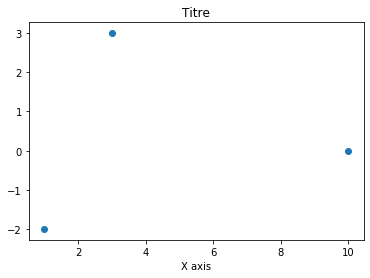

In [61]:
plt.scatter([1, 3, 10], [-2, 3, 0])
plt.title("Titre")
plt.xlabel("X axis")
plt.savefig("comme_matlab.png")

In [62]:
!comme_matlab.png

On va **préférer la méthode par laquelle on modifier directement la figure au travers des objets qui la constituent**.

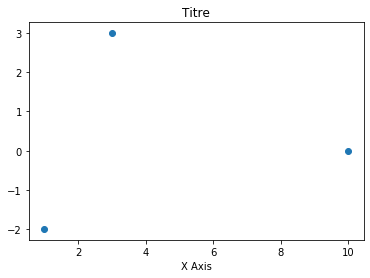

In [63]:
fig, ax = plt.subplots()
ax.scatter([1, 3, 10], [-2, 3, 0])
ax.set_title("Titre")
ax.set_xlabel("X Axis")
fig.savefig("avec_des_objets.jpg")

In [64]:
!image_with_matplotlib.png

'image_with_matplotlib.png' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


On peut utiliser `Matplotlib` directement mais on retrouve en fait la librairie un peu partout, dans `pandas` notamment.

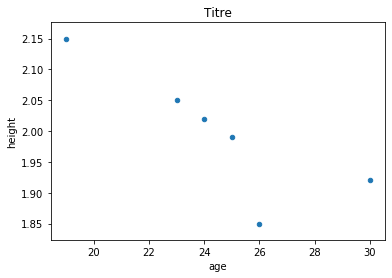

In [65]:
ax = df.plot(x="age", y="height", kind="scatter", title="Titre")
fig = ax.get_figure()
fig.savefig("avec_pandas.pdf")

In [66]:
!avec_pandas.pdf

In [67]:
!del /f comme_matlab.png avec_des_objets.jpg avec_pandas.pdf